# Assignment 7

*EE2703: Applied Programming   
Author: Varun Sundar, EE16B068*

# Abstract

This weeks assignment covers the usage of numpy polynomial libraries as well as scipy's signal processing module to analyse LTI signals. 

# Introduction

In particular, we shall utilise continuous time Laplace transforms. This is done for the case of driver oscillators, coupled spring mass systems and an instance of second order low pass systems.

Scipy's signal processing libraries allow us to 

Conventions:

1. We are using Python 3, GCC for C 
2. Underscore naming vs Camel Case 
3. PEP 25 convention style.




In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

#%matplotlib nbagg
#For Interactive Plots

%matplotlib inline

In [3]:
class Spring(object):
    '''
    Solve for a spring mass system of nth order
    Given differential polynomial and laplace domain representation of forcing function.
    '''
    def __init__(self,D,f,initial=None,degree=2):
        # D is the D operator coefficients
        # f is the Laplace transform of the forcing function [Num,Denom]
        self.D=np.poly1d(D)
        self.f=f
        self.degree=degree
        self.set_initial_conditions(initial)

    def set_initial_conditions(self,L=None):
        
        # L being the list of initial conditions
        
        if not L:
            self.initial_conditions=np.zeros(self.degree)
        else:
            if len(L)==self.degree:
                self.initial_conditions=L # x_{'},x_{''},x_{'''},...
            else:
                raise ValueError('Represents a list of coefficients with a mismatch to degree')
                
    def __print__(self):
        return str(np.poly1d(self.D))+" = " + str(self.f)
    
    @staticmethod
    def cosine_forcing(omega,sigma,bode=False):
        # Generate the laplace domain representation for a cosine forcing function.
        Num=np.poly1d([1,sigma])
        Denom=Num*Num+ np.poly1d([omega**2])
        f= sp.lti(Num,Denom)    # Num, Denominator
        
        if bode:
            w,S,phi=f.bode()
            fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
            ax1.semilogx(w,S)
            ax2.semilogx(w,phi)
        return [Num,Denom]
    
    def solve(self,time,bode=False):
        self.initial_conditions_polynomial=np.poly1d(np.multiply(self.initial_conditions,np.array(self.D)[:-1]))
        #self.H=sp.lti(self.f[0],self.f[1]*self.D) 
        self.H=sp.lti(self.f[0]+self.initial_conditions_polynomial*self.f[1],self.f[1]*self.D)
        
        if bode:
            w,S,phi=self.H.bode()
            fig,(ax1,ax2)=plt.subplots(2,1)
            ax1.semilogx(w,S)
            ax1.set_title("Magnitude plot")
            ax2.semilogx(w,phi)
            ax2.set_title("Phase plot")
            fig.tight_layout()
            plt.show()
        
        print(self.H)
        t,x=sp.impulse(self.H,None, time)
        plt.title("Response with time")
        plt.plot(t,x)
        plt.show()

[poly1d([ 1. ,  0.5]), poly1d([ 1. ,  1. ,  2.5])]

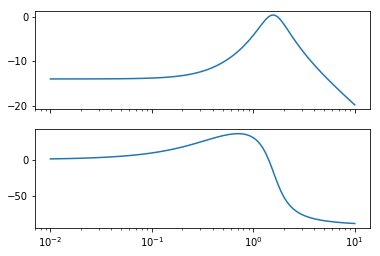

In [4]:
# Example of cosine forcing Bode plot
Spring.cosine_forcing(1.5,0.5,1)

# Assignment Questions

## Problem 1

We solve for the time response of a spring satisfying
 $$  \frac{d^2 x}{dt^2}+2.25x= f(t) $$
 
 Where, 
 
 $$ f(t) =cos(1.5t)e^{−0.5t}u_0(t) $$
 
 and $f(t)$ has a laplace transform,
 
 $$ F(s)= \frac{s+0.5}{(s + 0.5)2 + 2.25} $$.
 
 Also, initial conditions are intial rest.

TransferFunctionContinuous(
array([ 1.,  5.]),
array([  1.    ,  10.    ,  29.5   ,  22.5   ,  61.3125]),
dt: None
)


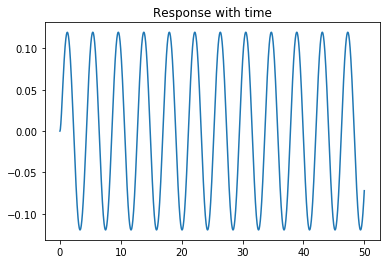

In [30]:
a=Spring([1,0,2.25],Spring.cosine_forcing(1.5,5))
a.solve(np.linspace(0,50,2000))

We notice that the steady state response is a decaying sinusoid function. This makes intuitive sense, according to Bode plot inerpretations. Also, note that the decay is hard to observe, unless the timespan is broadened.

## Problem 2

Now done with a much smaller decay,

 $$ f(t) =cos(1.5t)e^{−0.05t}u_0(t) $$

TransferFunctionContinuous(
array([ 1.  ,  0.05]),
array([ 1.      ,  0.1     ,  4.5025  ,  0.225   ,  5.068125]),
dt: None
)


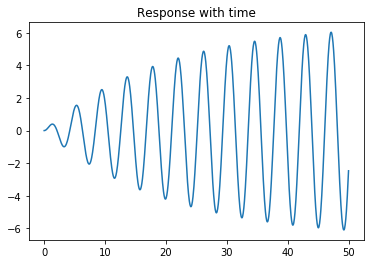

In [6]:
a=Spring([1,0,2.25],Spring.cosine_forcing(1.5,0.05))
a.solve(np.linspace(0,50,1001))

Here, the amplitude (at moderate time) is much larger owing to a much smaller decay.

## Problem 3

Now, we vary the frequency of the cosine in $f(t)$ from 1.4 to 1.6 in steps of 0.05 keeping the exponent as $exp(−0.05t)$ and plot the resulting responses.

We notice that resonance occurs at 1.5 radians/sec, which is the natural frequency of this under-damped spring mass system.

Frequency is 	 1.4
TransferFunctionContinuous(
array([ 1.  ,  0.05]),
array([ 1.      ,  0.1     ,  4.2125  ,  0.225   ,  4.415625]),
dt: None
)


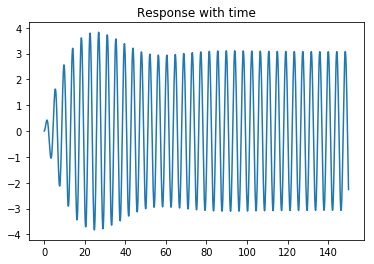

Frequency is 	 1.45
TransferFunctionContinuous(
array([ 1.  ,  0.05]),
array([ 1.     ,  0.1    ,  4.355  ,  0.225  ,  4.73625]),
dt: None
)


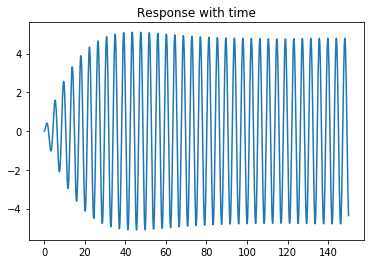

Frequency is 	 1.5
TransferFunctionContinuous(
array([ 1.  ,  0.05]),
array([ 1.      ,  0.1     ,  4.5025  ,  0.225   ,  5.068125]),
dt: None
)


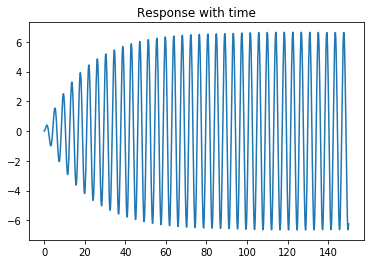

Frequency is 	 1.55
TransferFunctionContinuous(
array([ 1.  ,  0.05]),
array([ 1.     ,  0.1    ,  4.655  ,  0.225  ,  5.41125]),
dt: None
)


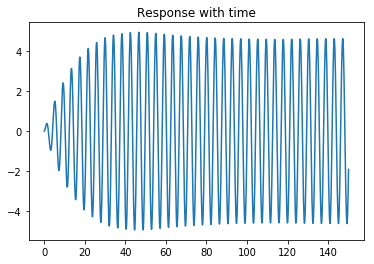

Frequency is 	 1.6
TransferFunctionContinuous(
array([ 1.  ,  0.05]),
array([ 1.      ,  0.1     ,  4.8125  ,  0.225   ,  5.765625]),
dt: None
)


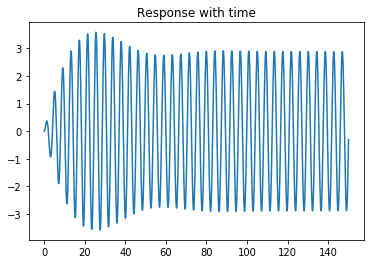

In [7]:
frequencies=np.linspace(1.4,1.6,5)
for freq in frequencies:
    print ("Frequency is \t", freq)
    a=Spring([1,0,2.25],Spring.cosine_forcing(freq,0.05))
    a.solve(np.linspace(0,150,1001))

## Problem 4

We solve for the coupled differential system.

$$\ddot{x}+(x−y) = 0$$
$$\ddot{y}+2(y−x) = 0$$

with $$x(0) = 1, \dot{x}(0) = y(0) = \dot{y}(0) = 0$$

This is done by substituting for y from the first equation into the second and obtaining a fourth order equation. We solve for its time evolution, and from it obtain $x(t)$ and $y(t)$ for $0 ≤ t ≤ 20$.

Our implementation of the Spring mass system allows us to solve constant coefficient ODE's, so we utlise the same. We can also use coupled ODE packages under scipy as an alternative, which would be recommended for more complicated coupled harmonic equations.

TransferFunctionContinuous(
array([ 1.,  0., -3.,  0.]),
array([ 1.,  0.,  3.,  0.,  0.]),
dt: None
)


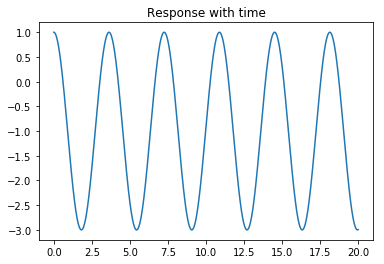

In [8]:

# For x, x_4+x_23=0
a=Spring([1,0,3,0,0],[0,1],initial=[1,0,-1,0],degree=4)
a.solve(np.linspace(0,20,1000))

%matplotlib inline

TransferFunctionContinuous(
array([ 6.,  0.]),
array([ 1.,  0.,  3.,  0.,  0.]),
dt: None
)


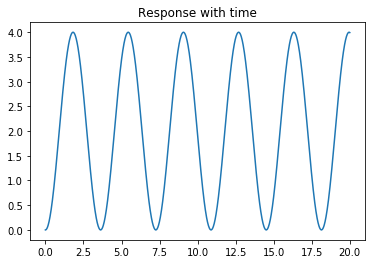

In [9]:
# For y, y_4+y_2*3=0
a=Spring([1,0,3,0,0],[0,1],initial=[0,0,2,0],degree=4)
a.solve(np.linspace(0,20,1000))

We observe that the outputs are sinusoids, and $90^{\circ}$ out of phase. This can be interpreted in terms of a double mass, single spring system, with the extension in the spring alternating in phase.

## Problem 5

We obtain the magnitude and phase response of the steady state transfer function of a low-pass network, second order network.

TransferFunctionContinuous(
array([  1.00000000e+12]),
array([  1.00000000e+00,   1.00000000e+08,   1.00000000e+12]),
dt: None
)


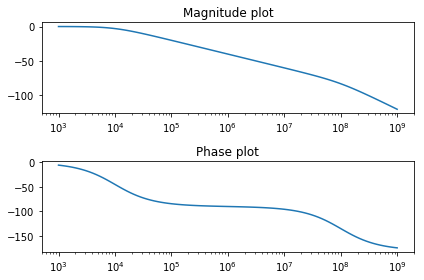

In [10]:
H=sp.lti(1,np.poly1d([1e-12,1e-4,1]))
print(H)
w,S,phi=H.bode()
fig,(ax1,ax2)=plt.subplots(2,1)
ax1.semilogx(w,S)
ax1.set_title("Magnitude plot")
ax2.semilogx(w,phi)
ax2.set_title("Phase plot")
fig.tight_layout()
plt.show()

## Problem 6

With regard to the previous two port, we obtain the output for

$$ v_i(t) = cos (10^3t)u(t)−cos(10^6t)u(t)$$  
Obtain the output voltage $v_0(t)$ by defining the transfer function as a system and obtaining the output using *signal.lsim*.
We observe the output for a small timescale and a large timescale of $30\mu s$ and $30m s$ respectively.

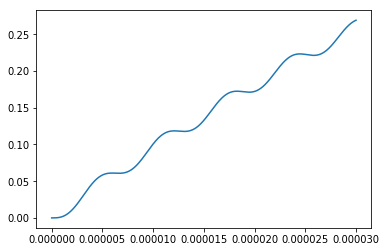

In [11]:
%matplotlib inline
t=np.linspace(0,30e-6,1000)
f=np.cos(1e3*t)-np.cos(1e6*t)
t,y,svec=sp.lsim(H,f,t)
plt.figsize=(20,20)
plt.plot(t,y)

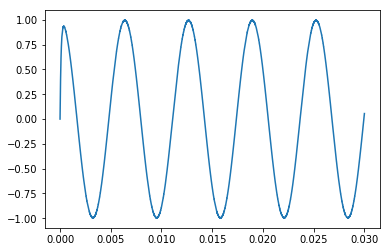

In [31]:
%matplotlib inline
t=np.linspace(0,30e-3,10000)
f=np.cos(1e3*t)-np.cos(1e6*t)
t,y,svec=sp.lsim(H,f,t)
plt.figsize=(20,20)
plt.plot(t,y)

Here, the high frequency component is diminshed at steady state, and the low pass filter allows only the harmonic of $1k Hz$ through. This is seen in the large timespan. The smaller timespan shows the slight pertubation caused by the diminished high frequency component. 

This is similar to a linear assumption made for many pulse width modulation systems, including DC-DC converters; where we approximate a duty cycle modulated pulse train by its averaged step response.

# Results and Discussion

Analysing LTI systems and approximate linear behaviour models are crucial in many aspects of engineering. Here, we have explored the usage of built-in python libraries under numpy's polynomial library, scipy's signal processing  and linear simulation modules.

This allows for convinient analysis of many systems, including spring systems, electrical filters, coupled bodies,...etc. We have covered a few as a part of this assignment.